In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datset
data = pd.read_csv("IPL_Dataset.csv")

In [3]:
# see few rows
data.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [4]:
# check NULL values
data.isnull().sum()

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

#### Q1. What is the maximum number of matches played by an individual player in a season?

In [8]:
print("Maximum No. of matches played by individual is: ",data["Mat"].max())

Maximum No. of matches played by individual is:  17


In [12]:
data[data["Mat"].eq(data["Mat"].max())][["Player","Mat"]]

,Player,Mat
1,Shikhar Dhawan,17
3,Shreyas Iyer,17
19,Marcus Stoinis,17
67,Kagiso Rabada,17


In [13]:
data[data["Mat"].eq(data["Mat"].max())]

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
19,20,Marcus Stoinis,17,17,3,352,65,25.14,237,148.52,0,3,31,16
67,68,Kagiso Rabada,17,8,4,56,15*,14.00,49,114.28,0,0,4,2


#### Q2. What is the highest average of a player in a season?


In [14]:
print("Highest Average of a player is: ",data["Avg"].max())

Highest Average of a player is:  101.0


In [15]:
data[data["Avg"].eq(data["Avg"].max())]

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
57,58,Deepak Hooda,7,5,4,101,62*,101.0,71,142.25,0,1,5,5


Q3. What is the average number of matches played by the players in a season?


In [17]:
# Average Number of matches played by Each Player:
data.groupby(["Player"])["Mat"].mean()

Player
AB de Villiers       15.0
Aaron Finch          12.0
Abdul Samad          12.0
Abhishek Sharma       8.0
Ajinkya Rahane        9.0
                     ... 
Virat Kohli          15.0
Washington Sundar    15.0
Wriddhiman Saha       4.0
Yashasvi Jaiswal      3.0
Yuzvendra Chahal     15.0
Name: Mat, Length: 133, dtype: float64

Q4. Please check the correlation between all the features.


In [20]:
# list all the columns of dataset:
data.columns

Index(['POS', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s'],
      dtype='object')

In [23]:
data.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [21]:
# check dtype
data.dtypes

POS         int64
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Avg       float64
BF          int64
SR        float64
100         int64
50          int64
4s          int64
6s          int64
dtype: object

In [30]:
# Apply some EDA before finding Correlation.

# Remove '*' and convert to int64
data['HS'] = data['HS'].str.replace('*', '').astype('int64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     133 non-null    int64  
 1   Player  133 non-null    object 
 2   Mat     133 non-null    int64  
 3   Inns    133 non-null    int64  
 4   NO      133 non-null    int64  
 5   Runs    133 non-null    int64  
 6   HS      133 non-null    int64  
 7   Avg     133 non-null    float64
 8   BF      133 non-null    int64  
 9   SR      133 non-null    float64
 10  100     133 non-null    int64  
 11  50      133 non-null    int64  
 12  4s      133 non-null    int64  
 13  6s      133 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 14.7+ KB


In [32]:
# Select only int and float columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop("POS",axis=1) 
                                        # Drop 'POS' column bcoz it is of ordinal category type.

# Calculate the correlation between selected numerical columns
correlation_matrix = numerical_columns.corr()

correlation_matrix

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Mat,1.000000,0.728358,0.555261,0.565237,0.456171,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367
Inns,0.728358,1.000000,0.464356,0.895914,0.832002,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922
NO,0.555261,0.464356,1.000000,0.308747,0.235613,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472
Runs,0.565237,0.895914,0.308747,1.000000,0.913250,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166
HS,0.456171,0.832002,0.235613,0.913250,1.000000,0.774646,0.904798,0.608398,0.383540,0.841283,0.875322,0.812893
Avg,0.306128,0.585148,0.429888,0.687475,0.774646,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224
BF,0.555102,0.889753,0.271021,0.989948,0.904798,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916
SR,0.371328,0.581468,0.415060,0.517678,0.608398,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317
100,0.128405,0.224328,0.019726,0.382577,0.383540,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767
50,0.455437,0.755027,0.174184,0.912264,0.841283,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501


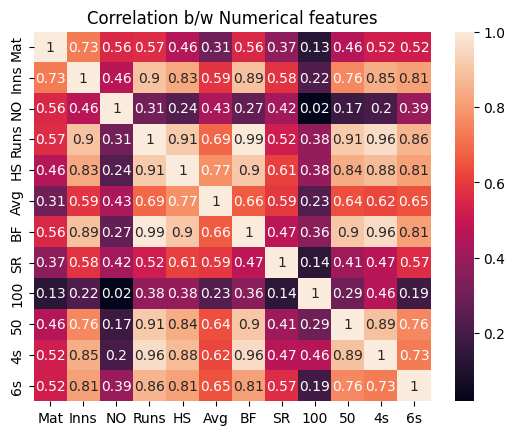

In [35]:
plt.plot(figsize=(12,12))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.title("Correlation b/w Numerical features")
plt.show();

Q5. Check the list of players who has an average greater than 50 as well strike rate above 120.

In [39]:
print(data[data["Avg"].gt(50) & data["SR"].gt(120)]["Player"])

0            KL Rahul
4        Ishan Kishan
31     Kieron Pollard
36    Wriddhiman Saha
37    Ruturaj Gaikwad
57       Deepak Hooda
60         Tom Curran
Name: Player, dtype: object


Q6. Please check the list of players who has an average greater than 40 and balls faced above 100.

In [40]:
print(data[data["Avg"].gt(40) & data["BF"].gt(100)]["Player"])

0            KL Rahul
1      Shikhar Dhawan
4        Ishan Kishan
8         Virat Kohli
9      AB de Villiers
10     Faf du Plessis
14        Eoin Morgan
24    Kane Williamson
27        Chris Gayle
28         Ben Stokes
31     Kieron Pollard
32      Rahul Tewatia
33    Ravindra Jadeja
36    Wriddhiman Saha
37    Ruturaj Gaikwad
Name: Player, dtype: object


Q7. Please check the list of players who scored more than 300 runs with an average greater than 45 & strike rate above 130.

In [41]:
print(data[data["Avg"].gt(45) & data["SR"].gt(130) & data["Runs"]>300]["Player"])

Series([], Name: Player, dtype: object)


In [42]:
data.sample(3)

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
57,58,Deepak Hooda,7,5,4,101,62,101.0,71,142.25,0,1,5,5
118,119,Nikhil Naik,1,1,0,1,1,1.0,3,33.33,0,0,0,0
95,96,Sandeep Sharma,13,5,3,12,9,6.0,15,80.00,0,0,1,0


In [43]:
data["Runs"].max()

670

Q8. Players who scroed alteast one century in this season.

In [45]:
print(data[data["100"].ge(1)]["Player"])

0           KL Rahul
1     Shikhar Dhawan
13    Mayank Agarwal
28        Ben Stokes
Name: Player, dtype: object


Q9. Players who scored atleast 4 half centuries in this season.

In [46]:
print(data[data["50"].ge(4)]["Player"])

0             KL Rahul
1       Shikhar Dhawan
2         David Warner
4         Ishan Kishan
5      Quinton de Kock
6     Suryakumar Yadav
7     Devdutt Padikkal
9       AB de Villiers
10      Faf du Plessis
Name: Player, dtype: object


In [47]:
data.sample(1)

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
13,14,Mayank Agarwal,11,11,0,424,106,38.54,271,156.45,1,2,44,15


Q10. Check the list of players who hit more than 45 boundARIES and more than 10 sixes in this season.


In [ ]:
print(data[data["Avg"].gt(50) & data["SR"].gt(120)]["Player"])

Q11. Plot a histogram of number of matches played in a season by players.


Q12. Plot the histogram of balls faced by players.

Q13. Top 20 players with most runs in a season.

Q14. Bar chart for top 20 players with best strike rate in a season.

Q15. Top 30 players with highest number of sixes.

Q16. Scatter plot of runs scored by a player v/s balls faced in a season.

Q17. KDE plot for averages on a season.